In [210]:
import numpy as np
import pandas as pd
from scipy.stats import norm

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook
plt.ion()

from ipywidgets import Label, HBox, VBox, IntSlider, ToggleButton, Layout
from IPython.display import display

In [211]:
DEFAULT_COLORS = [color for color_dict in plt.rcParams['axes.prop_cycle'] for _, color in color_dict.items()]

plotting the Platonic ideal of the bell curve

<IPython.core.display.Javascript object>


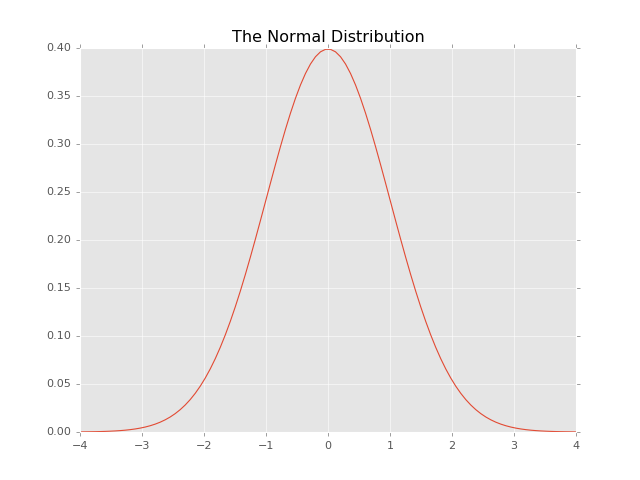

In [212]:
MU = 0                   # mean
SIGMA = 1                # standard deviation
X_LIMITS = (-4, 4)       # the limits of our graph
EVALUATION_POINTS = 100  # number of points to evaluate bell curve at

xs = np.linspace(*X_LIMITS, EVALUATION_POINTS)  # evaluation points
ys = norm.pdf(xs, loc=MU, scale=SIGMA)          # evaluate!

ideal_axes = plt.figure().add_subplot(111)
ideal_axes.plot(xs, ys)
ideal_axes.set_title('The Normal Distribution')
plt.show()

plotting a sampled gaussian

In [213]:
SAMPLE_SIZE = 100
samples = norm.rvs(size=SAMPLE_SIZE, loc=MU, scale=SIGMA)

In [214]:
samples

array([ 0.57221823, -0.58125413,  1.47124318,  1.53914208, -0.44265509,
       -1.01132732,  1.23433705,  1.26355075,  1.76656954,  0.08987554,
        0.33123342, -1.16178125, -0.17861291,  0.23813137,  1.07059724,
        1.12529676, -0.4290796 , -1.45720625,  0.102482  , -0.57163089,
        0.2443216 ,  0.14552137, -0.1214467 , -0.55942509,  0.59231585,
       -1.30558547,  0.41706923, -1.90597524,  1.01907448,  0.43935872,
        1.88793319,  0.28117915,  0.46316556,  0.09439374,  0.08261791,
        0.32745584,  0.62080343,  1.78759027, -1.82629093, -1.64664771,
       -0.57744253, -1.00361129, -1.17464453, -0.89465702, -2.52509755,
        1.86524749, -0.48591075, -0.00334339, -0.4178259 ,  0.79740553,
        0.26816258,  0.3583265 ,  0.10786758, -1.17172182,  0.70872548,
        0.57410327,  0.49799773, -0.19737311, -1.50704855, -0.49392967,
        0.05786568,  0.81125435, -0.15910697, -0.95838733, -2.18082451,
        0.74905848,  2.03730073, -1.38912421, -0.50619366,  1.16

In [215]:
sorted_indices

array([187,  46, 194,  36,  33, 183, 113, 182, 147,  38, 134,  12, 137,
       140, 164, 126,  61, 168,  83,  27, 104, 186,  74, 177, 125, 138,
       180, 142, 175, 106, 139, 105, 120, 143,  37, 174, 193, 111, 136,
        45,  63,  60,  70,  59, 156,  84,  86,  10, 191,  15, 176, 133,
       151, 170,  77,   0,  75, 163,  29, 107,  30, 144,  16,  51, 198,
        95,  99,  91, 155, 123,  13,  96, 117, 114,   4,  72,  20,  14,
        50,  90,  64, 146, 102, 108, 185,  32,  94,  71, 167, 190,  34,
       135, 101, 109, 184, 195, 152, 179, 122,  88,  92, 100,  24,  58,
       165,  76,  23, 160,  11, 169,  66, 181, 121,  98,  87, 132,  73,
       128,  89,  54,   2,  79,  85, 158,  39,  47,  26,  48, 141,   1,
        35, 150, 145,   3,  22,   5,  52, 154,   8,  78,   9, 153,  68,
        28,  55, 172, 178,  57, 149,  53,  81, 115,  80,  21,  65, 118,
       112, 192,  69, 188,   7,  43,   6,  19, 159,  42, 131,  40, 197,
       199, 124,  25, 116,  82, 161, 157,  17, 189,  18, 196,  9

HBox(children=(Label(value='Scrambled'), IntSlider(value=0, readout=False), Label(value='Sorted')))

<IPython.core.display.Javascript object>


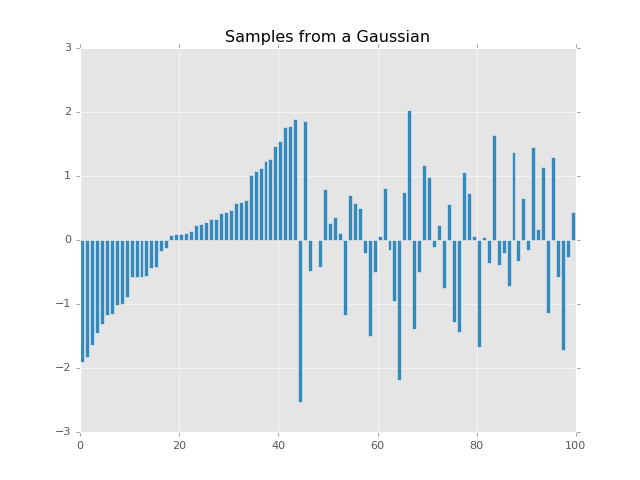

In [216]:
def change_sorted_state(change):
    global bars
    threshold = change.new
    sorted_samples = samples[sorted_indices[sorted_indices < change.new]]
    for value, bar in zip(sorted_samples, bars[:threshold]):
        bar.set_height(value)
    for value, bar in zip(samples[threshold:], bars[threshold:]):
        bar.set_height(value) 
    for bar in bars:
        bar.set_y(0)

slider = IntSlider(min=0, max=SAMPLE_SIZE, value=0, readout=False)
slider.observe(change_sorted_state, names='value')
control_box = HBox([Label('Scrambled'), slider, Label('Sorted')])
display(control_box)

sorted_indices = np.argsort(samples)
sampled_axes = plt.figure().add_subplot(111)
bars = sampled_axes.bar(np.arange(SAMPLE_SIZE), samples)
sampled_axes.set_title('Samples from a Gaussian')
plt.show()

histogram + overlays

VBox(children=(HBox(children=(ToggleButton(value=False, description='Toggle Mean'), ToggleButton(value=False, description='Toggle Median'), ToggleButton(value=False, description='Toggle Parent Distribution', layout=Layout(width='200px')))), HBox(children=(IntSlider(value=100, description='Sample Size', max=1000, min=100, step=100), IntSlider(value=10, description='Number of Bins', min=10, step=10, style=SliderStyle(description_width='initial'))))))

<IPython.core.display.Javascript object>


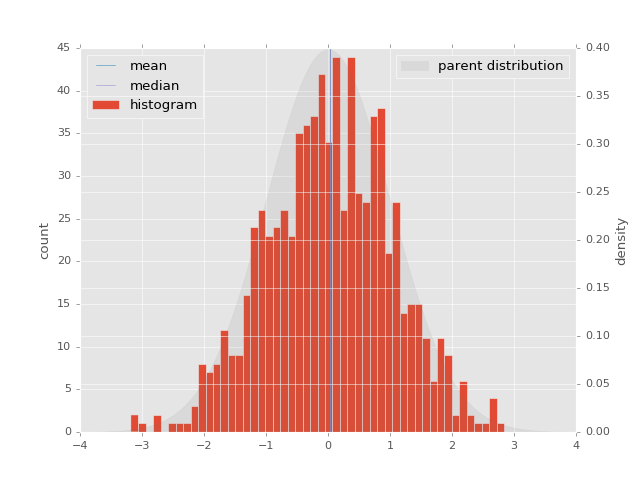

In [222]:
class GaussianExplorer:
    
    def __init__(self):
        plt.ioff()
        self.twin_axes = None
        self.histogram = None
        self.mean_line = None
        self.median_line = None
        self.ideal_overlay = None
        
        self.samples = norm.rvs(size=self.MIN_SAMPLES, loc=MU, scale=SIGMA)
        self.bins = GaussianExplorer.MIN_BINS
        
        self.histogram_axes = plt.figure().add_subplot(111)
        self.histogram_axes.set_ylabel('count')
        
        self.redraw_histogram()

    def toggle_mean(self, change):
        if change['new'] is True:
            self.mean_line = self.histogram_axes.axvline(
                self.samples.mean(),
                color=self.DEFAULT_COLORS[1],
                linewidth=0.5,
                label='mean'
            )
        else:
            self.mean_line.remove(); self.mean_line = None;
        self.histogram_axes.legend(loc=2)

    def toggle_median(self, change):
        if change['new'] is True:
            self.median_line = self.histogram_axes.axvline(
                np.median(self.samples),
                color=self.DEFAULT_COLORS[2],
                linewidth=0.5,
                label='median'
            )
        else:
            self.median_line.remove(); self.median_line = None;
        self.histogram_axes.legend(loc=2)

    def toggle_ideal(self, change):
        if change['new'] is True:
            self.twin_axes = self.histogram_axes.twinx()
            self.ideal_overlay = self.twin_axes.fill_between(
                xs, 0, ys,
                color=self.DEFAULT_COLORS[3],
                alpha=0.1,
                label='parent distribution'
            )
            self.twin_axes.set_ylabel('density')
            self.twin_axes.legend(loc=1)
        else:
            self.ideal_overlay.remove(); self.ideal_overlay = None;
            self.twin_axes.remove(); self.twin_axes = None;

    def resample(self, change):
        sample_size = change['new']
        self.samples = norm.rvs(size=sample_size, loc=MU, scale=SIGMA)
        self.redraw_histogram()
        if self.mean_line is not None:
            self.toggle_mean({'new': False}); self.toggle_mean({'new': True});
        if self.median_line is not None:
            self.toggle_median({'new': False}); self.toggle_median({'new': True});

    def rebin(self, change):
        self.bins = change['new']
        self.redraw_histogram()
    
    def redraw_histogram(self):
        if self.histogram is not None:
            [bar.remove() for bar in self.histogram]; self.histogram = None;
        _, _, self.histogram = self.histogram_axes.hist(
            self.samples,
            bins=self.bins,
            color=self.DEFAULT_COLORS[0],
            label='histogram'
        )
        self.histogram_axes.relim()
        self.histogram_axes.autoscale()
        self.histogram_axes.legend(loc=2)
        
GaussianExplorer.MIN_SAMPLES = 100
GaussianExplorer.MAX_SAMPLES = 1000
GaussianExplorer.SAMPLE_STEP = 100
GaussianExplorer.MIN_BINS = 10
GaussianExplorer.MAX_BINS = 100
GaussianExplorer.BIN_STEP = 10
GaussianExplorer.DEFAULT_COLORS = [
    color for color_dict in plt.rcParams['axes.prop_cycle']
          for _, color in color_dict.items()
]

ge = GaussianExplorer()
mean_button = ToggleButton(description='Toggle Mean')
mean_button.observe(ge.toggle_mean, 'value')
median_button = ToggleButton(description='Toggle Median')
median_button.observe(ge.toggle_median, 'value')
ideal_button = ToggleButton(
    description='Toggle Parent Distribution',
    layout=Layout(width='200px')
)
ideal_button.observe(ge.toggle_ideal, 'value')
samples_slider = IntSlider(
    min=GaussianExplorer.MIN_SAMPLES,
    max=GaussianExplorer.MAX_SAMPLES,
    step=GaussianExplorer.SAMPLE_STEP,
    value=GaussianExplorer.MIN_SAMPLES,
    description='Sample Size'
)
samples_slider.observe(ge.resample, 'value')
bins_slider = IntSlider(
    min=GaussianExplorer.MIN_BINS,
    max=GaussianExplorer.MAX_BINS,
    step=GaussianExplorer.BIN_STEP,
    value=GaussianExplorer.MIN_BINS,
    description='Number of Bins',
    style={'description_width': 'initial'}
)
bins_slider.observe(ge.rebin, 'value')
control_panel = VBox([
    HBox([mean_button, median_button, ideal_button]),
    HBox([samples_slider, bins_slider])
])

display(control_panel)
plt.show()
plt.ion()